In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
records = pd.read_csv('/content/records.csv')

In [3]:
records.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       50 non-null     int64  
 1   Q1_Timestamp    50 non-null     int64  
 2   Q1_CS_GPA       50 non-null     float64
 3   Q1_Overall_GPA  50 non-null     float64
 4   Q1_CS_Units     50 non-null     int64  
 5   Q1_Total_Units  50 non-null     int64  
 6   Q2_Timestamp    50 non-null     int64  
 7   Q2_CS_GPA       50 non-null     float64
 8   Q2_Overall_GPA  50 non-null     float64
 9   Q2_CS_Units     50 non-null     int64  
 10  Q2_Total_Units  50 non-null     int64  
 11  Q3_Timestamp    50 non-null     int64  
 12  Q3_CS_GPA       50 non-null     float64
 13  Q3_Overall_GPA  50 non-null     float64
 14  Q3_CS_Units     50 non-null     int64  
 15  Q3_Total_Units  50 non-null     int64  
 16  Q4_Timestamp    50 non-null     int64  
 17  Q4_CS_GPA       50 non-null     float

In [4]:
records[records['Q1_Timestamp'] == 202308]

,StudentID,Q1_Timestamp,Q1_CS_GPA,Q1_Overall_GPA,Q1_CS_Units,Q1_Total_Units,Q2_Timestamp,Q2_CS_GPA,Q2_Overall_GPA,Q2_CS_Units,...,Q4_Timestamp,Q4_CS_GPA,Q4_Overall_GPA,Q4_CS_Units,Q4_Total_Units,Q5_Timestamp,Q5_CS_GPA,Q5_Overall_GPA,Q5_CS_Units,Q5_Total_Units
0,1,202308,3.25,3.22,11,12,202401,3.32,3.62,16,...,202501,3.79,3.94,8,12,202503,2.77,2.88,16,19
6,7,202308,2.76,2.72,16,16,202401,2.45,2.21,9,...,202408,2.96,3.16,10,13,202503,3.18,3.05,12,16
24,25,202308,2.60,2.58,13,16,202401,3.25,3.42,16,...,202408,2.76,2.63,12,15,202501,3.88,3.96,8,10
28,29,202308,3.06,3.19,15,18,202401,3.79,3.54,11,...,202408,2.92,3.04,12,15,202503,3.14,3.02,12,14
35,36,202308,3.16,3.46,9,13,202401,3.43,3.40,8,...,202408,2.99,2.93,15,16,202501,3.16,2.99,16,18
43,44,202308,2.41,2.00,8,12,202401,2.87,3.01,9,...,202408,3.81,3.53,10,14,202508,2.15,2.14,15,17


In [5]:
records['Avg_CS_GPA'] = (records["Q1_CS_GPA"] + records["Q2_CS_GPA"] + records["Q3_CS_GPA"] + records["Q4_CS_GPA"] + records["Q5_CS_GPA"])/5

In [6]:
records['Avg_Overall_GPA'] = (records["Q1_Overall_GPA"] + records["Q2_Overall_GPA"] + records["Q3_Overall_GPA"] + records["Q4_Overall_GPA"] + records["Q5_Overall_GPA"])/5

In [7]:
records["Weighted_CS_GPA"] = ((records["Q1_CS_GPA"] * records['Q1_CS_Units']) + \
                            (records["Q2_CS_GPA"] * records['Q2_CS_Units']) + \
                            (records["Q3_CS_GPA"] * records['Q3_CS_Units']) + \
                            (records["Q4_CS_GPA"] * records['Q4_CS_Units']) + \
                            (records["Q5_CS_GPA"] * records['Q5_CS_Units'])) / (records['Q1_CS_Units'] + records['Q2_CS_Units'] + records['Q3_CS_Units'] + records['Q4_CS_Units'] + records['Q5_CS_Units'])

In [8]:
records["Weighted_Overall_GPA"] = ((records["Q1_Overall_GPA"] * records['Q1_Total_Units']) + \
                            (records["Q2_Overall_GPA"] * records['Q2_Total_Units']) + \
                            (records["Q3_Overall_GPA"] * records['Q3_Total_Units']) + \
                            (records["Q4_Overall_GPA"] * records['Q4_Total_Units']) + \
                            (records["Q5_Overall_GPA"] * records['Q5_Total_Units'])) / (records['Q1_Total_Units'] + records['Q2_Total_Units'] + records['Q3_Total_Units'] + records['Q4_Total_Units'] + records['Q5_Total_Units'])

In [9]:
records["Total_CS_Units"] = records['Q1_CS_Units'] + records['Q2_CS_Units'] + records['Q3_CS_Units'] + records['Q4_CS_Units'] + records['Q5_CS_Units']

In [10]:
records["Total_Overall_Units"] = records['Q1_Total_Units'] + records['Q2_Total_Units'] + records['Q3_Total_Units'] + records['Q4_Total_Units'] + records['Q5_Total_Units']

In [11]:
records.head()

,StudentID,Q1_Timestamp,Q1_CS_GPA,Q1_Overall_GPA,Q1_CS_Units,Q1_Total_Units,Q2_Timestamp,Q2_CS_GPA,Q2_Overall_GPA,Q2_CS_Units,...,Q5_CS_GPA,Q5_Overall_GPA,Q5_CS_Units,Q5_Total_Units,Avg_CS_GPA,Avg_Overall_GPA,Weighted_CS_GPA,Weighted_Overall_GPA,Total_CS_Units,Total_Overall_Units
0,1,202308,3.25,3.22,11,12,202401,3.32,3.62,16,...,2.77,2.88,16,19,3.202,3.298,3.161864,3.301493,59,67
1,2,202108,2.77,2.68,8,9,202201,3.12,2.74,13,...,2.55,2.27,16,16,2.614,2.454,2.600323,2.438923,62,65
2,3,202203,3.73,3.68,13,17,202208,3.03,2.75,9,...,2.70,2.64,13,14,2.922,2.864,2.953571,2.926094,56,64
3,4,202208,2.70,3.07,12,12,202301,2.99,2.78,10,...,2.34,2.38,8,9,2.908,2.822,2.941429,2.837846,56,65
4,5,202108,3.37,3.40,9,10,202201,2.94,2.88,13,...,3.17,2.82,16,18,2.902,2.840,2.880806,2.770000,62,70


Note: Some students take quarters off

# Trend Analysis

In [12]:
quarters = ['Q1','Q2','Q3','Q4','Q5']
avg_cs_gpa = [records[f'{q}_CS_GPA'].mean() for q in quarters]
avg_overall_gpa = [records[f'{q}_Overall_GPA'].mean() for q in quarters]

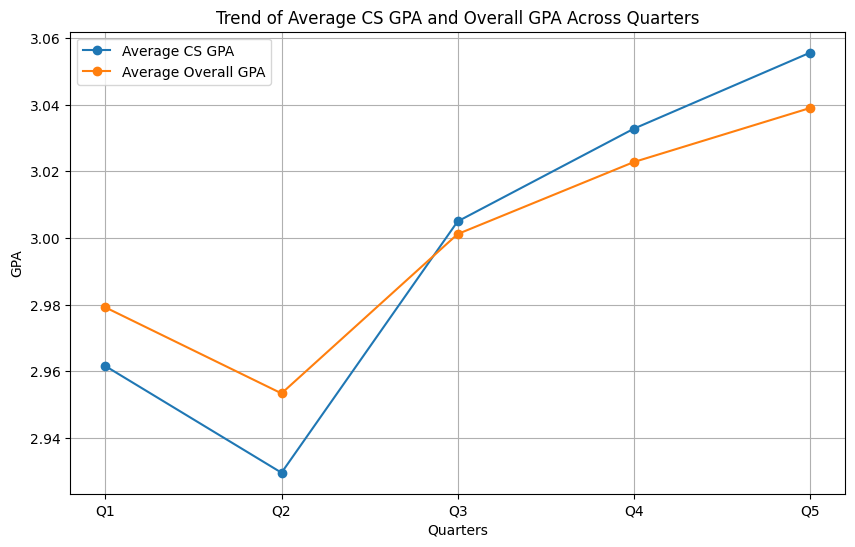

In [13]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(quarters, avg_cs_gpa, label='Average CS GPA', marker='o')
plt.plot(quarters, avg_overall_gpa, label='Average Overall GPA', marker='o')

# Add labels and title
plt.title('Trend of Average CS GPA and Overall GPA Across Quarters')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

# Will taking a break affect performance?

In [14]:
quarters = ['Q1','Q2','Q3','Q4','Q5']
time = []

for q in quarters:
  time += records[f'{q}_Timestamp'].unique().tolist()

time = sorted(list(set(time)))

In [15]:
time

[202103,
 202108,
 202201,
 202203,
 202208,
 202301,
 202303,
 202308,
 202401,
 202403,
 202408,
 202501,
 202503,
 202508]

In [16]:
consecutive = []
nonconsecutive = []

for i in range(50):
  individual = records.iloc[i]
  first_quarter = individual['Q1_Timestamp']
  last_quarter = individual['Q5_Timestamp']


  if time[time.index(first_quarter) + 4] == last_quarter:
    consecutive.append(individual['StudentID'])
  else:
    nonconsecutive.append(individual['StudentID'])

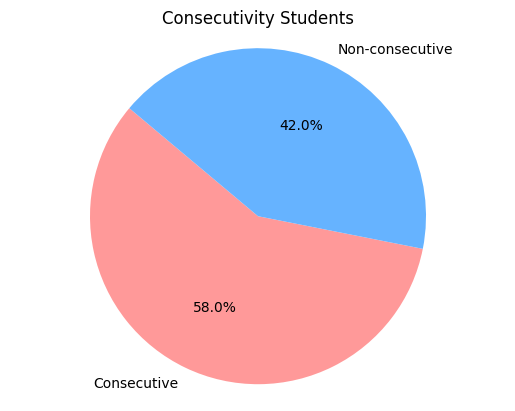

In [17]:
# Data for the pie chart
labels = ['Consecutive', 'Non-consecutive']
sizes = [len(consecutive), len(nonconsecutive)]
colors = ['#ff9999','#66b3ff']

# Plotting the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures the pie is drawn as a circle.
plt.axis('equal')

# Display the plot
plt.title('Consecutivity Students')
plt.show()

In [18]:
consecutive = records[records['StudentID'].isin(consecutive)]
nonconsecutive = records[records['StudentID'].isin(nonconsecutive)]

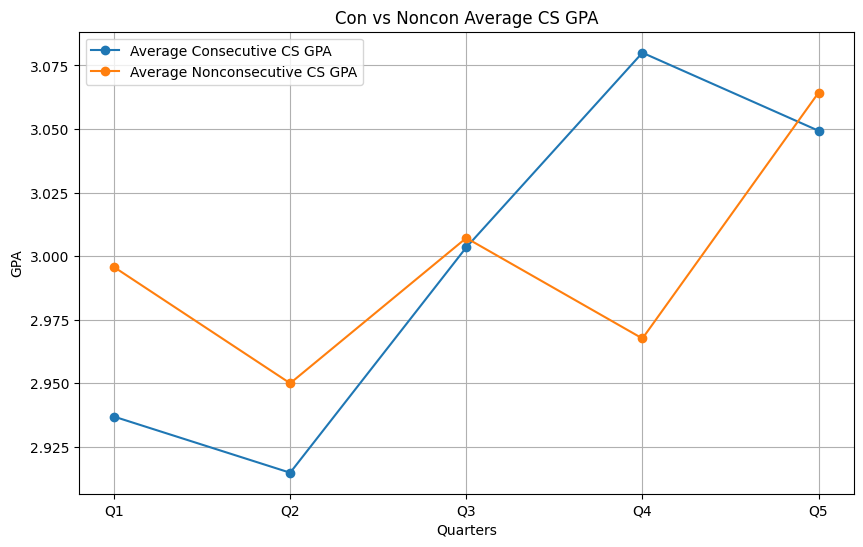

In [19]:
quarters = ['Q1','Q2','Q3','Q4','Q5']
avg_con_cs_gpa = [consecutive[f'{q}_CS_GPA'].mean() for q in quarters]
avg_con_overall_gpa = [consecutive[f'{q}_Overall_GPA'].mean() for q in quarters]

avg_non_con_cs_gpa = [nonconsecutive[f'{q}_CS_GPA'].mean() for q in quarters]
avg_non_con_overall_gpa = [nonconsecutive[f'{q}_Overall_GPA'].mean() for q in quarters]

# Plot
plt.figure(figsize=(10,6))
plt.plot(quarters, avg_con_cs_gpa, label='Average Consecutive CS GPA', marker='o')
plt.plot(quarters, avg_non_con_cs_gpa, label='Average Nonconsecutive CS GPA', marker='o')

# Add labels and title
plt.title('Con vs Noncon Average CS GPA')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

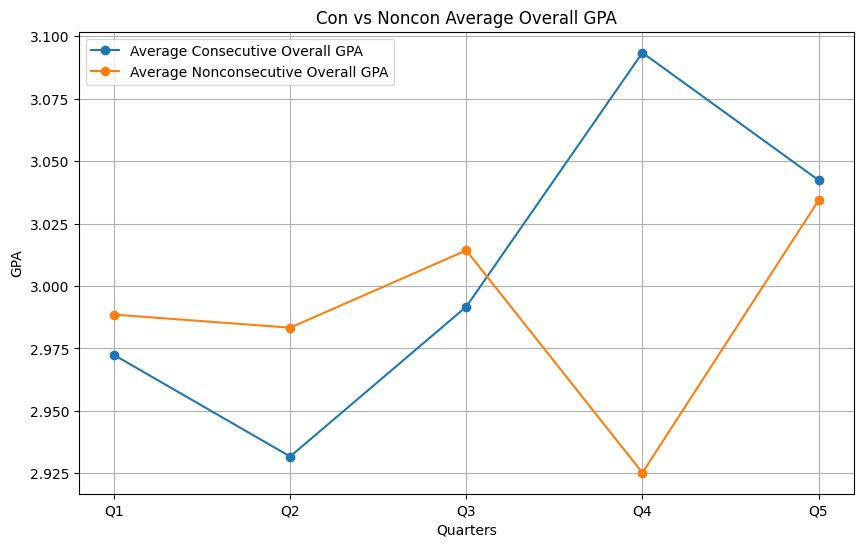

In [20]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(quarters, avg_con_overall_gpa, label='Average Consecutive Overall GPA', marker='o')
plt.plot(quarters, avg_non_con_overall_gpa, label='Average Nonconsecutive Overall GPA', marker='o')

# Add labels and title
plt.title('Con vs Noncon Average Overall GPA')
plt.xlabel('Quarters')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
consecutive['Total_CS_Units'].describe()

,Total_CS_Units
count,29.000000
mean,59.344828
std,5.245923
min,47.000000
25%,56.000000
50%,59.000000
75%,62.000000
max,74.000000


In [22]:
nonconsecutive['Total_CS_Units'].describe()

,Total_CS_Units
count,21.000000
mean,60.190476
std,4.190693
min,53.000000
25%,58.000000
50%,60.000000
75%,63.000000
max,69.000000


In [23]:
consecutive['Total_Overall_Units'].describe()

,Total_Overall_Units
count,29.000000
mean,69.137931
std,5.309857
min,55.000000
25%,66.000000
50%,69.000000
75%,73.000000
max,83.000000


In [24]:
nonconsecutive['Total_Overall_Units'].describe()

,Total_Overall_Units
count,21.000000
mean,71.095238
std,6.032452
min,62.000000
25%,67.000000
50%,71.000000
75%,74.000000
max,85.000000


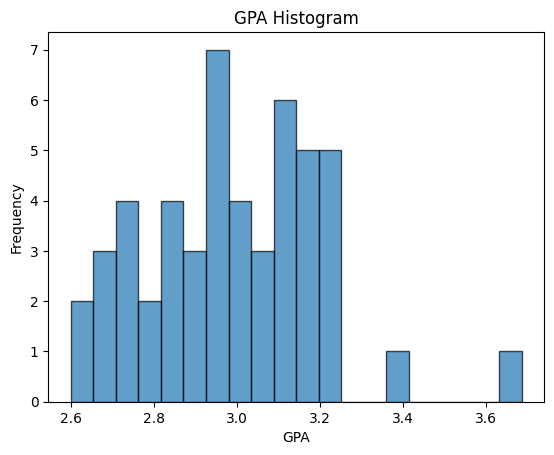

In [25]:
# 1. Plotting Histogram
plt.hist(records['Weighted_CS_GPA'], bins=20, edgecolor='black', alpha=0.7)
plt.title('GPA Histogram')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

In [26]:
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as stats

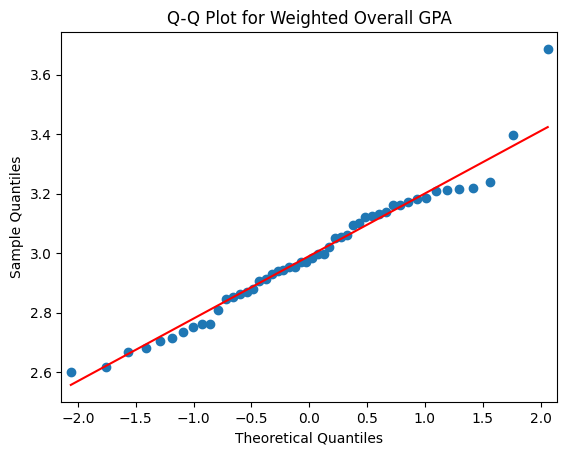

In [70]:
qqplot(records['Weighted_CS_GPA'], line='s')
plt.title('Q-Q Plot for Weighted Overall GPA')
plt.show()

In [28]:
shapiro_test = stats.shapiro(records['Weighted_CS_GPA'])
print(f"Shapiro-Wilk Test: W={shapiro_test[0]}, p-value={shapiro_test[1]}")

Shapiro-Wilk Test: W=0.9654636219888313, p-value=0.1504766968144286


In [29]:
records['Weighted_CS_GPA'].skew()

0.4857881114065211

In [30]:
records['Weighted_CS_GPA'].kurtosis()

1.0582522035175153

In [31]:
records.columns

Index(['StudentID', 'Q1_Timestamp', 'Q1_CS_GPA', 'Q1_Overall_GPA',
       'Q1_CS_Units', 'Q1_Total_Units', 'Q2_Timestamp', 'Q2_CS_GPA',
       'Q2_Overall_GPA', 'Q2_CS_Units', 'Q2_Total_Units', 'Q3_Timestamp',
       'Q3_CS_GPA', 'Q3_Overall_GPA', 'Q3_CS_Units', 'Q3_Total_Units',
       'Q4_Timestamp', 'Q4_CS_GPA', 'Q4_Overall_GPA', 'Q4_CS_Units',
       'Q4_Total_Units', 'Q5_Timestamp', 'Q5_CS_GPA', 'Q5_Overall_GPA',
       'Q5_CS_Units', 'Q5_Total_Units', 'Avg_CS_GPA', 'Avg_Overall_GPA',
       'Weighted_CS_GPA', 'Weighted_Overall_GPA', 'Total_CS_Units',
       'Total_Overall_Units'],
      dtype='object')

# Independent T-test to compare students who took a gap quarter and student who didn't

In [32]:
from scipy.stats import ttest_ind

ttest_result = ttest_ind(nonconsecutive['Avg_CS_GPA'], consecutive['Avg_CS_GPA'], equal_var=False)
print(f"t-statistic={ttest_result.statistic}, p-value={ttest_result.pvalue}")

t-statistic=0.0008809489731538439, p-value=0.999301970218495


# Focus only on students who took gap quarter, check their before and after

In [33]:
nonconsecutive.head()

,StudentID,Q1_Timestamp,Q1_CS_GPA,Q1_Overall_GPA,Q1_CS_Units,Q1_Total_Units,Q2_Timestamp,Q2_CS_GPA,Q2_Overall_GPA,Q2_CS_Units,...,Q5_CS_GPA,Q5_Overall_GPA,Q5_CS_Units,Q5_Total_Units,Avg_CS_GPA,Avg_Overall_GPA,Weighted_CS_GPA,Weighted_Overall_GPA,Total_CS_Units,Total_Overall_Units
0,1,202308,3.25,3.22,11,12,202401,3.32,3.62,16,...,2.77,2.88,16,19,3.202,3.298,3.161864,3.301493,59,67
1,2,202108,2.77,2.68,8,9,202201,3.12,2.74,13,...,2.55,2.27,16,16,2.614,2.454,2.600323,2.438923,62,65
6,7,202308,2.76,2.72,16,16,202401,2.45,2.21,9,...,3.18,3.05,12,16,2.952,2.964,2.971667,2.957324,60,71
7,8,202201,3.18,3.49,12,16,202203,2.98,3.29,10,...,3.05,2.65,12,13,2.788,2.852,2.716190,2.785065,63,77
9,10,202401,3.05,3.24,12,15,202403,2.65,2.58,13,...,3.00,2.95,11,11,2.930,2.896,2.906667,2.870294,60,68


In [34]:
quarter_before_gap = []
time_before_gap = []
time_after_gap = []


cs_gpa_before_gap = []
cs_gpa_after_gap = []

cs_unit_before_gap = []
cs_unit_after_gap = []

total_unit_before_gap = []
total_unit_after_gap = []

for i in range(len(nonconsecutive)):


  individual = nonconsecutive.iloc[i]
  q1 = individual['Q1_Timestamp']
  q2 = individual['Q2_Timestamp']
  q3 = individual['Q3_Timestamp']
  q4 = individual['Q4_Timestamp']
  q5 = individual['Q5_Timestamp']


  for i,j,k in [(1,q1,q2),(2,q2,q3),(3,q3,q4),(4,q4,q5)]:
      if time[time.index(j) + 1] != k:
        quarter_before_gap.append(f'Q{i}')

        cs_gpa_before_gap.append(individual[f'Q{i}_CS_GPA'])
        cs_gpa_after_gap.append(individual[f'Q{i+1}_CS_GPA'])

        cs_unit_before_gap.append(individual[f'Q{i}_CS_Units'])
        cs_unit_after_gap.append(individual[f'Q{i+1}_CS_Units'])

        total_unit_before_gap.append(individual[f'Q{i}_Total_Units'])
        total_unit_after_gap.append(individual[f'Q{i+1}_Total_Units'])

        time_before_gap.append(individual[f'Q{i}_Timestamp'])
        time_after_gap.append(individual[f'Q{i+1}_Timestamp'])

  # if time[time.index(q1) + 1] != q2:
  #   quarter_before_gap.append('Q1')
  #   cs_gpa_before_gap.append(individual['Q1_CS_GPA'])
  #   cs_gpa_after_gap.append(individual['Q2_CS_GPA'])

  #   cs_unit_before_gap.append(individual['Q1_CS_Units'])
  #   cs_unit_after_gap.append(individual['Q2_CS_Units'])

  # if time[time.index(q2) + 1] != q3:
  #   quarter_before_gap.append('Q2')
  #   cs_gpa_before_gap.append(individual['Q2_CS_GPA'])
  #   cs_gpa_after_gap.append(individual['Q3_CS_GPA'])

  #   cs_unit_before_gap.append(individual['Q2_CS_Units'])
  #   cs_unit_after_gap.append(individual['Q3_CS_Units'])


  # if time[time.index(q3) + 1] != q4:
  #   quarter_before_gap.append('Q3')
  #   cs_gpa_before_gap.append(individual['Q3_CS_GPA'])
  #   cs_gpa_after_gap.append(individual['Q4_CS_GPA'])

  #   cs_unit_before_gap.append(individual['Q3_CS_Units'])
  #   cs_unit_after_gap.append(individual['Q4_CS_Units'])

  # if time[time.index(q4) + 1] != q5:
  #   quarter_before_gap.append('Q4')
  #   cs_gpa_before_gap.append(individual['Q4_CS_GPA'])
  #   cs_gpa_after_gap.append(individual['Q5_CS_GPA'])

  #   cs_unit_before_gap.append(individual['Q4_CS_Units'])
  #   cs_unit_after_gap.append(individual['Q5_CS_Units'])


In [35]:
from collections import Counter
cnt = Counter(quarter_before_gap)

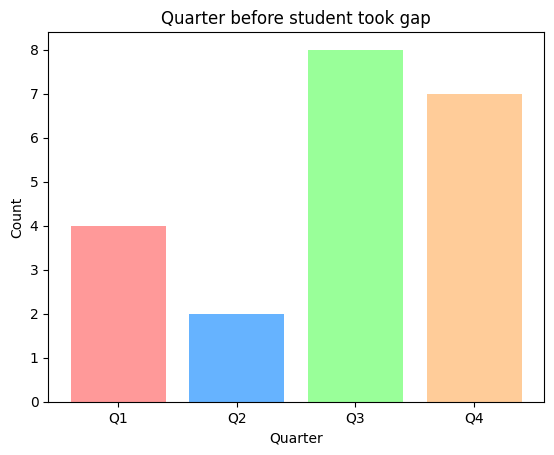

In [36]:
# Data for the bar chart
categories = ['Q1', 'Q2', 'Q3', 'Q4']
values = [cnt['Q1'], cnt['Q2'], cnt['Q3'], cnt['Q4']]

# Plotting the bar chart
plt.bar(categories, values, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])

# Adding titles and labels
plt.xlabel('Quarter')
plt.ylabel('Count')
plt.title('Quarter before student took gap')

# Display the plot
plt.show()

In [37]:
sum(cs_gpa_before_gap)/len(cs_gpa_before_gap)

3.074761904761905

In [38]:
sum(cs_gpa_after_gap)/len(cs_gpa_after_gap)

3.021428571428571

In [74]:
Q1_index = [i for i in range(len(quarter_before_gap)) if quarter_before_gap[i] =='Q1']
Q1_cs_gpa_before_gap = [cs_gpa_before_gap[i] for i in range(len(cs_gpa_before_gap)) if i in Q1_index]
Q1_cs_gpa_after_gap = [cs_gpa_after_gap[i] for i in range(len(cs_gpa_after_gap)) if i in Q1_index]

ttest_result = ttest_rel(Q1_cs_gpa_before_gap, Q1_cs_gpa_after_gap, alternative='greater')
ttest_result

TtestResult(statistic=0.42933363843859673, pvalue=0.34832346118567714, df=3)

In [75]:
Q2_index = [i for i in range(len(quarter_before_gap)) if quarter_before_gap[i] =='Q2']
Q2_cs_gpa_before_gap = [cs_gpa_before_gap[i] for i in range(len(cs_gpa_before_gap)) if i in Q2_index]
Q2_cs_gpa_after_gap = [cs_gpa_after_gap[i] for i in range(len(cs_gpa_after_gap)) if i in Q2_index]

ttest_result = ttest_rel(Q2_cs_gpa_before_gap, Q2_cs_gpa_after_gap, alternative='greater')
ttest_result

TtestResult(statistic=1.928571428571427, pvalue=0.15226430798788007, df=1)

In [54]:
Q3_index = [i for i in range(len(quarter_before_gap)) if quarter_before_gap[i] =='Q3']
quarter_before_gap
Q3_index

[0, 1, 7, 8, 10, 11, 15, 19]

In [56]:
Q3_cs_gpa_before_gap = [cs_gpa_before_gap[i] for i in range(len(cs_gpa_before_gap)) if i in Q3_index]
Q3_cs_gpa_before_gap
Q3_cs_gpa_after_gap = [cs_gpa_after_gap[i] for i in range(len(cs_gpa_after_gap)) if i in Q3_index]
Q3_cs_gpa_after_gap

[3.79, 2.49, 2.38, 3.24, 3.26, 2.61, 3.44, 3.29]

In [58]:
Q3_cs_gpa_before_gap

[2.88, 2.14, 3.13, 2.89, 2.31, 2.84, 4.0, 3.82]

In [72]:
from scipy.stats import ttest_rel
ttest_result = ttest_rel(Q3_cs_gpa_before_gap, Q3_cs_gpa_after_gap, alternative='greater')
ttest_result

TtestResult(statistic=-0.25802802277849934, pvalue=0.598096541393641, df=7)

In [73]:
Q4_index = [i for i in range(len(quarter_before_gap)) if quarter_before_gap[i] =='Q4']
Q4_cs_gpa_before_gap = [cs_gpa_before_gap[i] for i in range(len(cs_gpa_before_gap)) if i in Q4_index]
Q4_cs_gpa_after_gap = [cs_gpa_after_gap[i] for i in range(len(cs_gpa_after_gap)) if i in Q4_index]

ttest_result = ttest_rel(Q4_cs_gpa_before_gap, Q4_cs_gpa_after_gap, alternative='greater')
ttest_result

TtestResult(statistic=0.19317438922678215, pvalue=0.42659782570503213, df=6)

In [78]:
Q3_cs_gpa_before_gap

[2.88, 2.14, 3.13, 2.89, 2.31, 2.84, 4.0, 3.82]

In [79]:
Q3_cs_gpa_after_gap

[3.79, 2.49, 2.38, 3.24, 3.26, 2.61, 3.44, 3.29]

In [100]:
len(cs_gpa_after_gap)


21

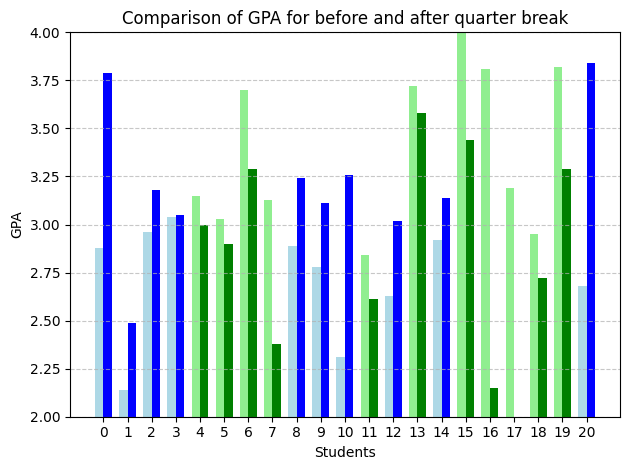

In [101]:


# Example data: GPA of students for Q1 and Q2
students = [i for i in range(len(cs_gpa_before_gap))]


# Define custom colors for each student's bars
colors_q1 = ['lightgreen' if cs_gpa_before_gap[i]>cs_gpa_after_gap[i] else 'lightblue' for i in range(len(cs_gpa_before_gap))]  # Custom colors for Q1
colors_q2 = ['green' if cs_gpa_before_gap[i]>cs_gpa_after_gap[i] else 'blue' for i in range(len(cs_gpa_before_gap))]

# Set the position of the bars on the x-axis
x = np.arange(len(students))  # positions for students on x-axis

# Define the width of the bars
width = 0.35

# Create the bar chart
fig, ax = plt.subplots()

# Plot the bars for each student with custom colors
for i in range(len(students)):
    ax.bar(x[i] - width/2, cs_gpa_before_gap[i], width, color=colors_q1[i])
    ax.bar(x[i] + width/2, cs_gpa_after_gap[i], width, color=colors_q2[i])

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Students')
ax.set_ylabel('GPA')
ax.set_title('Comparison of GPA for before and after quarter break')
ax.set_xticks(x)
ax.set_xticklabels(students)

# Zoom in on the GPA differences by setting y-axis limits
ax.set_ylim(2, 4)  # adjust this range based on your data

# Add gridlines for better visibility of differences
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Display the bar chart
plt.tight_layout()
plt.show()


In [39]:

ttest_result = ttest_rel(cs_gpa_before_gap, cs_gpa_after_gap)
ttest_result

TtestResult(statistic=0.3573894390863121, pvalue=0.7245439079022654, df=20)

In [40]:
ttest_result = ttest_rel(cs_unit_before_gap,cs_unit_after_gap)
ttest_result

TtestResult(statistic=-0.3313450919975289, pvalue=0.7438305706682455, df=20)

In [41]:
ttest_result = ttest_rel(total_unit_before_gap, total_unit_after_gap)
ttest_result

TtestResult(statistic=0.0, pvalue=1.0, df=20)

In [42]:
cs_gpa_nogap = []
cs_gpa_gap = []
for target_time, gpa in zip(time_after_gap,cs_gpa_after_gap):
  temp = []
  for i in range(len(consecutive)):
    individual = consecutive.iloc[i]
    t1 = individual['Q1_Timestamp']
    t2 = individual['Q2_Timestamp']
    t3 = individual['Q3_Timestamp']
    t4 = individual['Q4_Timestamp']
    t5 = individual['Q5_Timestamp']


    if t1 == target_time:
      temp.append(individual['Q1_CS_GPA'])
    if t2 == target_time:
      temp.append(individual['Q2_CS_GPA'])
    if t3 == target_time:
      temp.append(individual['Q3_CS_GPA'])
    if t4 == target_time:
      temp.append(individual['Q4_CS_GPA'])
    if t5 == target_time:
      temp.append(individual['Q5_CS_GPA'])

  if len(temp) != 0:
    cs_gpa_nogap.append(sum(temp)/len(temp))
    cs_gpa_gap.append(gpa)

In [43]:
from scipy.stats import ttest_ind

ttest_result = ttest_ind(cs_gpa_gap, cs_gpa_nogap, equal_var=False)
print(f"t-statistic={ttest_result.statistic}, p-value={ttest_result.pvalue}")

t-statistic=0.7099050350862794, p-value=0.4862813016203046


In [44]:
target = records['StudentID'].isin(consecutive['StudentID']).tolist()

In [45]:
target = [int(i) for i in target]

In [46]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = records.drop(columns=["StudentID"])
y = target


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Get feature importances
importances = clf.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)


                 Feature  Importance
7         Q2_Overall_GPA    0.321864
19        Q4_Total_Units    0.188552
20          Q5_Timestamp    0.174603
11             Q3_CS_GPA    0.129500
6              Q2_CS_GPA    0.095694
1              Q1_CS_GPA    0.089787
23           Q5_CS_Units    0.000000
21             Q5_CS_GPA    0.000000
22        Q5_Overall_GPA    0.000000
0           Q1_Timestamp    0.000000
24        Q5_Total_Units    0.000000
18           Q4_CS_Units    0.000000
26       Avg_Overall_GPA    0.000000
27       Weighted_CS_GPA    0.000000
28  Weighted_Overall_GPA    0.000000
29        Total_CS_Units    0.000000
25            Avg_CS_GPA    0.000000
15          Q4_Timestamp    0.000000
17        Q4_Overall_GPA    0.000000
16             Q4_CS_GPA    0.000000
14        Q3_Total_Units    0.000000
13           Q3_CS_Units    0.000000
12        Q3_Overall_GPA    0.000000
10          Q3_Timestamp    0.000000
9         Q2_Total_Units    0.000000
8            Q2_CS_Units    0.000000
5

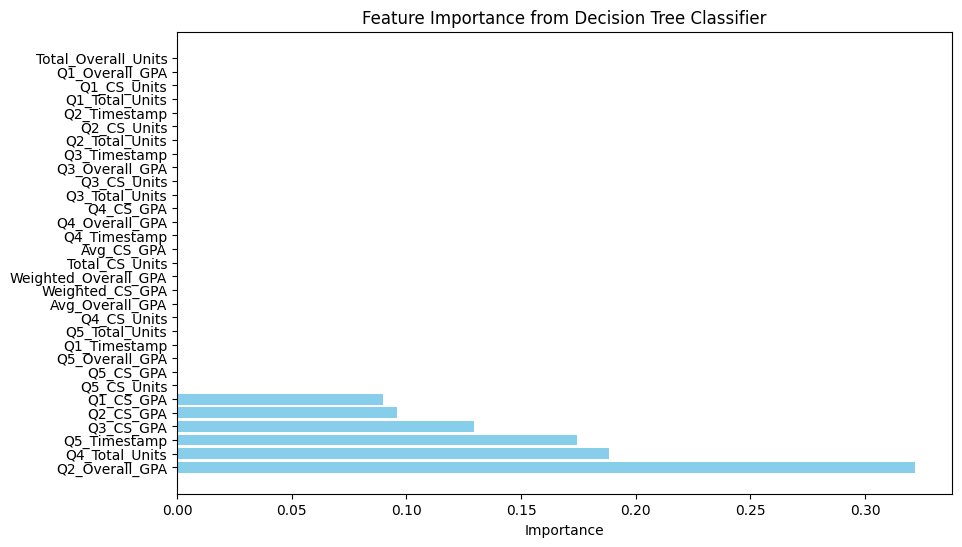

In [47]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Decision Tree Classifier')
plt.show()

In [48]:
ttest_result = ttest_ind(nonconsecutive['Q5_Timestamp'], consecutive['Q5_Timestamp'], equal_var=False)
print(f"t-statistic={ttest_result.statistic}, p-value={ttest_result.pvalue}")

t-statistic=1.4115426952218983, p-value=0.1649481516744664


In [49]:
nonconsecutive['Q2_CS_GPA'].mean()

2.9499999999999997

In [50]:
consecutive['Q2_CS_GPA'].mean()

2.9148275862068966

# Note: On Average, student who took gap quarter have higher grades